In [1]:
import numpy as np
import time
import copy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import random

## Basic use of Python nested lists

In [2]:
def fill(coords,board):
    h = len(board)
    w = len(board[0])
    for c in coords:
        if c[0] < 0 or c[0] >= h or c[1] < 0 or c[1] >= w:
            print(f'({c[0]},{c[1]}) failed since ouside of board')
        else:
            board[c[0]][c[1]] = 1.
    return board

def val(board,i,j,h,w):
    if i < 0 or i >= h or j < 0 or j >= w:
        return 0.
    else:
        return board[i][j]
    
def play(board,i,j,h,w):
    neigh = int(sum([val(board,n[0],n[1],h,w) for n in [(i-1,j-1),(i-1,j),(i-1,j+1),(i,j+1),(i+1,j+1),(i+1,j),(i+1,j-1),(i,j-1)]]))
    if val(board,i,j,h,w) == 1. and (neigh == 2 or neigh == 3):
        return 1.
    if val(board,i,j,h,w) == 0. and neigh == 3:
        return 1.
    return 0.

In [3]:
def run(start_state, simulation_time, print_states=False):
    h = len(start_state)
    w = len(start_state[0])
    current_board = copy.deepcopy(start_state)
    
    for _ in range(0,simulation_time):
        if print_states:
            print(np.array(current_board))
        updated_board =  copy.deepcopy(current_board)
        for i in range(h):
            for j in range(w):
                updated_board[i][j] = play(current_board, i, j, h, w)
        current_board = copy.deepcopy(updated_board)
        # time.sleep(0.5)
    return current_board
        
    

In [4]:
glider = [(2,0),(1,2),(2,1),(2,2),(0,1)]
blinker = [(1,1),(2,1),(3,1)]
block = [(1,1),(1,2),(2,1),(2,2)]

In [5]:
b = np.zeros((10,10)).tolist()
fill(blinker,b)
print(np.array(run(b,20,print_states=False)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Working with matplotlib to make animation

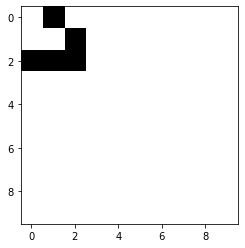

In [6]:
b = np.zeros((10,10)).tolist()
b = fill(glider, b)
plt.imshow(b, cmap='Greys', interpolation='nearest')

In [7]:
def run_animated(start_state, simulation_time, show_anim=True, save_file=False, save_file_loc='examples/gol.mp4', interval = 200):
    h = len(start_state)
    w = len(start_state[0])    
    fig = plt.figure()
    im = plt.imshow(start_state, cmap='Greys',  interpolation='nearest')
    
    def init():
        plt.show()
        return im,
        
    def update(frame):
        print(frame, end="\r")
        if frame != 0:
            current_board = im.get_array()
            updated_board = np.zeros((h,w)).tolist()
            for i in range(h):
                for j in range(w):
                    updated_board[i][j] = play(current_board, i, j, h, w)
            im.set_array(updated_board)
        return im,
        
    anim = FuncAnimation(fig, update, init_func=init, frames=simulation_time, interval=interval)
    
    if show_anim:
        display(HTML(anim.to_jshtml()))
        
    if save_file:
        im = plt.imshow(start_state, cmap='Greys',  interpolation='nearest')
        print('Saving file...')
        anim.save(save_file_loc)
        print(f'File saved @ {save_file_loc}')
        
    
    return anim

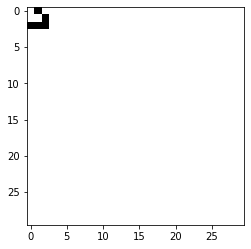

In [8]:
b = np.zeros((30,30)).tolist()

b = fill(glider, b)

anim = run_animated(b, 20)

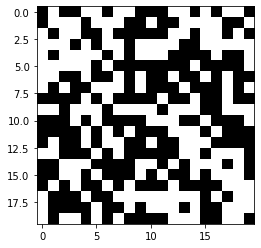

In [9]:
b = np.random.randint(2, size=(20,20)).tolist()
anim = run_animated(b, 40)

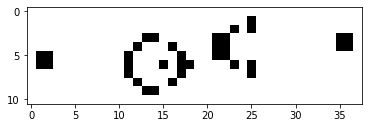

In [10]:
b = np.zeros((11,38)).tolist()
gosper_glider_gun = [(5,1),(5,2),(6,1),(6,2),
                     (5,11),(6,11),(7,11),(4,12),(3,13),(3,14),(6,15),(4,16),(5,17),(6,17),(6,18),(7,17),(8,16),(9,14),(9,13),(8,12),
                     (3,21),(4,21),(5,21),(3,22),(4,22),(5,22),(2,23),(6,23),(1,25),(2,25),(6,25),(7,25),
                     (3,35),(3,36),(4,35),(4,36)]
b = fill(gosper_glider_gun, b)
plt.imshow(b, cmap='Greys', interpolation='nearest')

In [11]:
# b = np.zeros((50,50)).tolist()
# b = fill(gosper_glider_gun, b)
# anim = run_animated(b, 60,interval = 150)

## Optimization

### Using sparse arrays

In [12]:
def create_sparse(coords):
    sparse = set()
    for c in coords:
        if c not in sparse:
            sparse.add(c)
    return sparse

def val_sparse(i,j,sparse):
    if (i,j) in sparse:
        return 1.
    else:
        return 0.
    
def play_sparse(curr_state):
    visited = set()
    next_state = set()
    for c in curr_state:
        i = c[0]
        j = c[1]
        neighbours = [(i-1,j-1),(i-1,j),(i-1,j+1),(i,j+1),(i+1,j+1),(i+1,j),(i+1,j-1),(i,j-1)]
        filled_neighbours = int(sum([1 if n in curr_state else 0 for n in neighbours]))
        if filled_neighbours == 2 or filled_neighbours == 3:
            next_state.add(c)
            
        for n in neighbours:
            if n not in visited and n not in curr_state:
                i = n[0]
                j = n[1]
                b_neighbours = [(i-1,j-1),(i-1,j),(i-1,j+1),(i,j+1),(i+1,j+1),(i+1,j),(i+1,j-1),(i,j-1)]
                filled_neighbours = int(sum([1 if b_n in curr_state else 0 for b_n in b_neighbours]))
                if filled_neighbours == 3:
                    next_state.add(n)
                                    
    return next_state
         
def run_sparse(start_state, simulation_time):
    
    curr_state = start_state.copy()
    
    for t in range(simulation_time):
        print(t, end='\r')
        curr_state = play_sparse(curr_state)
            
    return curr_state

In [13]:
def array_from_sparse(sparse, h = None, w = None):
    h_max, h_min = h, 0
    w_max, w_min = w, 0
    
    if not h:
        h_max = max(sparse, key=lambda item:item[0])[0] + 2
        h_min = min(sparse, key=lambda item:item[0])[0] - 1
        h = h_max-h_min
        
    if not w:
        w_max = max(sparse, key=lambda item:item[1])[1] + 2
        w_min = min(sparse, key=lambda item:item[1])[1] - 1
        w = w_max-w_min
    
    # print(f'h,w: ({h},{w})\nh_max, h_min: ({h_max},{h_min})\n w_max, w_min: ({w_max},{w_min})')
    
    b = np.zeros((h,w)).tolist()
    
    for c in sparse:
        i = c[0] - h_min
        j = c[1] - w_min
        if not(i < 0 or i >= h or j < 0 or j >= w):
            b[i][j] = 1
        
    return b
    
def draw(b):
    im = plt.imshow(b, cmap='Greys', interpolation='nearest')
    return im  

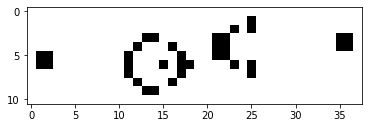

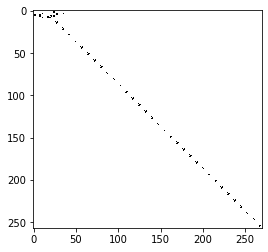

In [14]:
s = create_sparse(gosper_glider_gun)
plt.show(draw(array_from_sparse(s)))
s1 = run_sparse(s, 1000)
plt.show(draw(array_from_sparse(s1)))

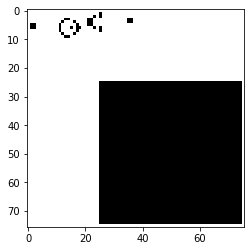

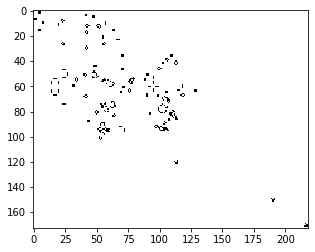

In [15]:
s = create_sparse([(random.randrange(25, 75), random.randrange(25, 75)) for i in range(200000)] + gosper_glider_gun)
plt.show(draw(array_from_sparse(s)))
s1 = run_sparse(s, 1000)
plt.show(draw(array_from_sparse(s1)))

In [16]:
def run_animated_sparse(start_sparse, simulation_time, show_anim=True, save_file=False, save_file_loc='examples/gol.mp4', interval = 200, size = None):
    
    if not size:
        h_max = max(start_sparse, key=lambda item:item[0])[0] + 2
        h_min = min(start_sparse, key=lambda item:item[0])[0] - 1
        h = h_max-h_min
        w_max = max(start_sparse, key=lambda item:item[1])[1] + 2
        w_min = min(start_sparse, key=lambda item:item[1])[1] - 1
        w = w_max-w_min
    else:
        h, w = size[0], size[1]
        
        
    fig = plt.figure()
    im = plt.imshow(array_from_sparse(start_sparse, h, w), cmap='Greys',  interpolation='nearest')
    
    global CURR_SPARSE
    CURR_SPARSE = start_sparse.copy()
    
    def init():
        plt.show()
        return im,
    
    def update(frame):
        print(frame, end="\r")
        global CURR_SPARSE
        if frame != 0:
            CURR_SPARSE = play_sparse(CURR_SPARSE)
            im.set_array(array_from_sparse(CURR_SPARSE, h, w))
            
        return im,
        
    anim = FuncAnimation(fig, update, init_func=init, frames=simulation_time, interval=interval)
    
    if show_anim:
        display(HTML(anim.to_jshtml()))
        
        
    if save_file:
        im.set_array(array_from_sparse(start_sparse, h, w))
        CURR_SPARSE = start_sparse.copy()
        print('Saving file...')
        anim.save(save_file_loc)
        print(f'File saved @ {save_file_loc}')
        
    
    return anim

In [17]:
# s = create_sparse(gosper_glider_gun)
# anim = run_animated_sparse(s, 400, size = (100,100), save_file=True, save_file_loc='examples/gosper_glider_gun.mp4', interval=25)

In [18]:
# s = create_sparse([(random.randrange(25, 75), random.randrange(25, 75)) for i in range(200000)])
# anim = run_animated_sparse(s, 100, size = (100,100), save_file=True, save_file_loc='examples/block.mp4', interval=25)

## Comparing Methods

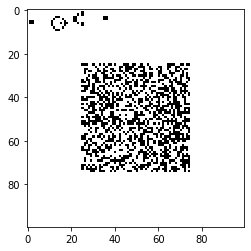

time for traditional: 29.301969051361084


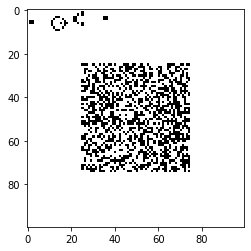

time for sparse: 1.1926262378692627


In [20]:
ic = [(random.randrange(25, 75), random.randrange(25, 75)) for i in range(1500)] + gosper_glider_gun

start = time.time()
b = np.zeros((100,100)).tolist()
b = fill(ic, b)
anim = run_animated(b, 30)
end = time.time()
print(f'time for traditional: {end - start}')

start = time.time()
s = create_sparse(ic)
anim = run_animated_sparse(s, 30, size = (100,100))
end = time.time()
print(f'time for sparse: {end - start}')

